<a href="https://colab.research.google.com/github/mserves/imersao_dados_alura/blob/main/Marcelo_Serves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INCLUSÃO ATRAVÉS DE INVESTIMENTO PRIVADO NO SETOR DE EDUAÇÃO**

O propósito desta análise é demonstrar a importância do investimento privado, seja através de investimento direto ou através de investimento em bolsas de estudos como ferramenta de inclusão social.

O ENEM é ferramenta fundamental para ingresso ao ensino superior, gratuito ou através de bolsas, e um bom resultado do ENEM garante ao candidato melhores oportunidades para o ensino superior.

Para analálise será utilizada a cidade de São José dos Campos, pois é de conhecimento público o investimento do setor privado em um institudo de educação, que vem se destacando como caso de sucesso neste tipo de investimento ao longo dos últimos anos.

In [ ]:
#@markdown Para análise foram importado os dados do ENEM e INEP, conforme detalhado no final deste documento, com as devidas referências.
import pandas as pd
import numpy as np
# extensão para mostrar tabelas no gooogle.colab
%load_ext google.colab.data_table
# opção para remover os warnings de cópia do pandas
pd.options.mode.chained_assignment = None  # default='warn'
# importando dados de são josé dos campos
fonte_sjc = "/content/drive/My Drive/Dados_Imersao_Alura/DADOS/MICRODADOS_ENEM_2019_sjc.csv"
# importando dados da amostra dos dados totais do enem
fonte_sample = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
# importando escolas de são josé dos campos de acordo com INEP 
fonte_escolas = "/content/drive/My Drive/Dados_Imersao_Alura/Lista_Escolas_Inep_sjc.csv"

#transformando os csvs em dataframes do pandas
dados_sample = pd.read_csv(fonte_sample)
dados_sjc = pd.read_csv(fonte_sjc)
dados_escolas_sjc = pd.read_csv(fonte_escolas, sep=r';')

Os dados de São José dos Campos foram extraidos dos dados toatais dos microdados do ENEM do ando de 2019.

In [ ]:
#@markdown A partir dos dados importados, as notas individuais das provas foram somadas como nota total e para fins da análise foram excluidos os alunos com nota total igual a zero.

renda_ordenada = dados_sjc["Q006"].unique()
renda_ordenada.sort() # ordenando a renda
# criando subset de colunas das notas e somando as notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT",
          "NU_NOTA_LC","NU_NOTA_REDACAO"]
dados_sjc["NU_NOTA_TOTAL"] = dados_sjc[provas].sum(axis=1)
dados_sample["NU_NOTA_TOTAL"] = dados_sample[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
# criado uma coluna de somatória das notas
# excluido notas totais igual a zero, que significa
# ausência na prova

dados_sem_notas_zero_sjc = dados_sjc\
.query("NU_NOTA_TOTAL != 0")

dados_sem_notas_zero_sample = dados_sample\
.query("NU_NOTA_TOTAL != 0")

In [ ]:
#@title ___
#criando dicionários de dados para facilitar a análise
genero = { 'M': 0, 'F':1}
estado_civil = {
      0:'não informado',
      1:'solteiro(a)',
      2:'casado(a)/união estável', 
      3:'divorciado(a)',
      4:'viúvo(a)'}
cor = {
    0: 'não declarado',
    1: 'branca',
    2: 'preta',
    3: 'parda',
    4: 'amarela',
    5: 'indígena'
}
nacionalidade = {
    0: 'não informado',
    1: 'brasileiro(a)',
    2: 'naturalizado(a)',
    3: 'estrangeiro(a)',
    4: 'brasileiro nascido no exterior'

}
conclusao = {
    1: 'ensino médio concluído',
    2: 'cursando, conclusão em 2019',
    3: 'cursando, conclusão após 2019',
    4: 'ensino médio não concluído e não cursando'
}
tipo_escola = {
    1: 'Sem Resposta', 
    2: 'Pública',
    3: 'Privada',
    4: 'Exterior',
}

tipo_ensino = {
    1: 'regular',
    2: 'especial',
    3: 'EJA'
    
}
localizacao_escola = {
    1: 'urbana',
    2: 'rural'
}
tipo_presenca = {
    0:'faltou',
    1:'presente',
    2:'eliminado'
}
idioma_estrangeiro = {
    0: 'inglês',
    1: 'espanhol'
}

status_redacao = {
    1: 'sem problemas',
    2: 'anulada',
    3: 'cópia texto motivador',
    4: 'em branco',
    6: 'fuga ao tema',
    7: 'não atendimento ao tipo textual',
    8: 'texto insuficiente',
    9: 'parte desconectada'
}
#Q006 = Renda familiar de A a Q quanto maior mais alta a renda 
renda_familiar = {
    "A"	: "Nenhuma renda.",
    "B": 	"Até R$ 998,00.",
    "C":	"De R$ 998,01 até R$ 1.497,00.",
    "D":	"De R$ 1.497,01 até R$ 1.996,00.",
    "E":	"De R$ 1.996,01 até R$ 2.495,00.",
    "F":	"De R$ 2.495,01 até R$ 2.994,00.",
    "G":	"De R$ 2.994,01 até R$ 3.992,00.",
    "H":	"De R$ 3.992,01 até R$ 4.990,00.",
    "I":  "De R$ 4.990,01 até R$ 5.988,00.",
    "J":	"De R$ 5.988,01 até R$ 6.986,00.",
    "K":	"De R$ 6.986,01 até R$ 7.984,00.",
    "L":	"De R$ 7.984,01 até R$ 8.982,00.",
    "M":  "De R$ 8.982,01 até R$ 9.980,00.",
    "N":	"De R$ 9.980,01 até R$ 11.976,00.",
    "O":	"De R$ 11.976,01 até R$ 14.970,00.",
    "P":  "De R$ 14.970,01 até R$ 19.960,00.",
    "Q": 	"Mais de R$ 19.960,00."
}

A ***Figura 1***, mostra que infelizmente **quanto maior a renda familiar, maior é a média e  a distribuição das notas dos alunos**, tanto para amostra utilizada, quanto para as notas dos alunos de São José dos Campos.

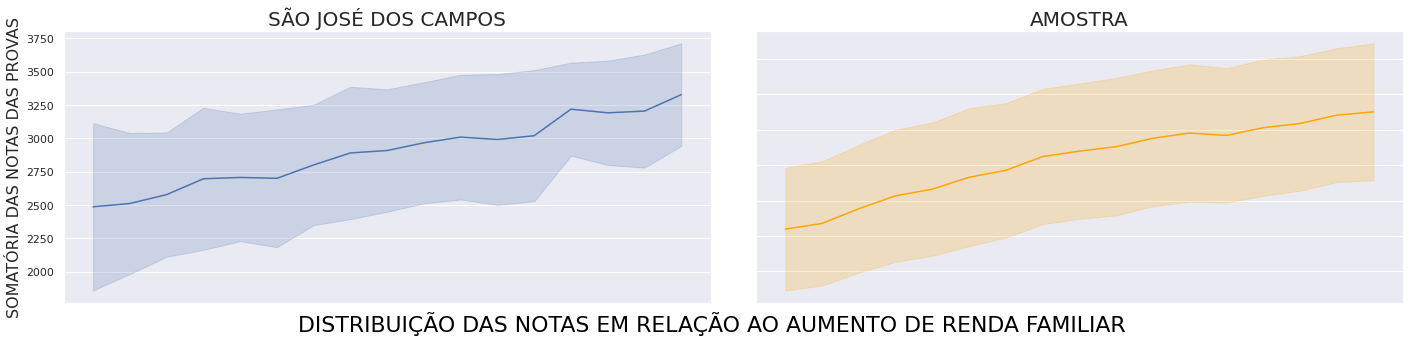

In [ ]:
#@title Figura 1: Distribuição das notas em relação ao aumento de renda familiar
#import de bibliotes dos gráficos
import matplotlib.style as style
import seaborn as sns
import matplotlib.pyplot as plt
# atribuir o estilo do saborn ao conjunto ao plots
sns.set()
# criando dataframe com a renda familiar ordenada
df1 = dados_sem_notas_zero_sjc\
[["Q006","NU_NOTA_TOTAL"]].sort_values(by="Q006")

df2 = dados_sem_notas_zero_sample\
[["Q006","NU_NOTA_TOTAL"]].sort_values(by="Q006")

#estabelecendo parametos gerais do gráfico
plt.rcParams['figure.figsize'] = [24,5]
plt.rcParams['font.size'] = 14

# criando uma figura de dois gáficos
fig, axs = plt.subplots(ncols=2)
fig.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.07, hspace=None)
#adicionando subtitulo ao gráfico
fig.suptitle('DISTRIBUIÇÃO DAS NOTAS EM RELAÇÃO AO '
            'AUMENTO DE RENDA FAMILIAR', 
             fontsize=22, y = 0.1, color='Black')

# gráfico de linha para o primeiro gráfico
sns.lineplot(ax=axs[0],data=df1, x="Q006", y="NU_NOTA_TOTAL",
             sort=True, ci='sd')
# gráfico de linha para o primeiro gráfico
sns.lineplot(ax=axs[1],data=df2, x="Q006", y="NU_NOTA_TOTAL",
             sort=True, ci='sd',
             color='orange')
#atributos do primeiro gráfico
axs[0].set_title("SÃO JOSÉ DOS CAMPOS", fontsize=20)
axs[0].set_xlabel("")
axs[0].set_ylabel("SOMATÓRIA DAS NOTAS DAS PROVAS", fontsize=16)
axs[0].set_xticks(ticks=[])
#atributos do primeiro gráfico sergundo gráfico
axs[1].set_title("AMOSTRA",fontsize=20)
axs[1].set_xlabel("")
axs[1].set_xticks(ticks=[])
axs[1].tick_params(axis='y', colors='white')
axs[1].set_ylabel("")
plt.tick_params(axis='both', which='minor', labelsize=14)

Embora os dados do Enem tragam uma pergunta sobre **tipo de escola**, cerca **71% dos alunos não responderam a esta pergunta**, desta forma seria **necessário confrontar os dados do Enem com os dados do catálogo de Escolas do Inep** para identificar quais escolas são privadas ou não. 

Para São José dos campos **100% dos inscritos responderam a questão**. 

Desta forma seria possível ver o resultado do gráfico anterior agora separando os alunos entre escolas privadas e públicas, com o **propósito de mostrar a influência do investimento privado no resultado do Enem**. 

Mas **como são poucos dados, qualquer erro na resposta vai influenciar diretamente a conclusão da análise.** Desta forma é **necessário validar a veraciade das respostas do tipo de escola respondido pelos inscritos.**

In [ ]:
#@markdown Percentual de inscritos que responderam a pergunta sobre o tipo de escola na amostra em questão
tipo_escola_sample = dados_sample['TP_ESCOLA']\
.value_counts(normalize=True).to_frame() #salvo em dataframe
# criando uma tabela legível
tipo_escola_sample.rename(index={1:'Não Respondeu',
                                 2:'Pública',
                                 3:'Privada'},
                          columns={'TP_ESCOLA':'Tipo de Escola'},
                          inplace=True)
print(tipo_escola_sample)

               Tipo de Escola
Não Respondeu        0.712883
Pública              0.243720
Privada              0.043398


In [ ]:
#@markdown Percentual de inscritos que responderam a pergunta sobre o tipo de escola em São José dos Campos
# igual anterior para sjc
tipo_escola_sjc = dados_sjc['TP_ESCOLA']\
.value_counts(normalize=True).to_frame()
tipo_escola_sjc.rename(index={1:'Não Respondeu',
                              2:'Pública',
                              3:'Privada'},
                      columns={'TP_ESCOLA':'Tipo de Escola'},
                      inplace=True)
print(tipo_escola_sjc)

         Tipo de Escola
Pública        0.764269
Privada        0.235731


Podemos observar uma **diferença na distribuição de inscritos de escolas públicas e privadas das resposta do Enem em relação aos dados do INEP** conforme ilustrado na Figura 2


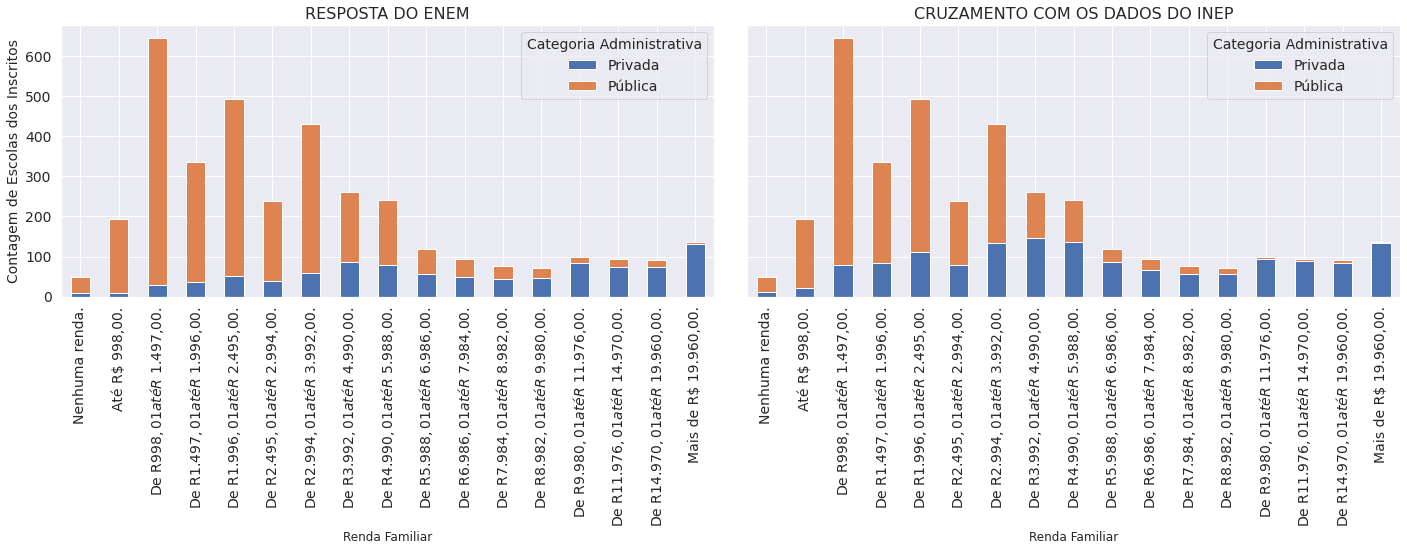

In [ ]:
#@title Figura 2: DISTRIBUIÇÃO DE INSCRITOS POR ESCOLA PÚBLICA OU PRIVADA
#crosstab
#separado os dados que vou criar o cross tab
escola_pergunta = dados_sem_notas_zero_sjc[['Q006','TP_ESCOLA']]
# renomeando nome das colunas
escola_pergunta.rename(columns={'TP_ESCOLA':
                                'Categoria Administrativa'}
                       ,inplace=True)
# criando tabela de referência cruzada já com aplicação
# do dicionário
cross = pd.DataFrame(pd.crosstab(index=escola_pergunta.Q006, 
                                 columns=\
                                 escola_pergunta['Categoria '
                                 'Administrativa']\
                                 .replace(tipo_escola)))
# aplicação do dicionario
cross['Renda'] = renda_familiar.values()
# transformando a coluna em index
cross.set_index( 'Renda', inplace=True)
#separado os dados que vou criar o cross tab
escolas = dados_sem_notas_zero_sjc[['CO_ESCOLA',
                     'Q006',
                     'TP_ESCOLA',
                     'NU_INSCRICAO',
                     'NU_NOTA_TOTAL']]
# transformando o código da escola em inteiro
dados_sem_notas_zero_sjc['CO_ESCOLA'] = \
dados_sem_notas_zero_sjc['CO_ESCOLA'].apply(np.int64)
# separando colunas dos nomes e códigos do INEP
# renomeando a coluna de código para ser igual a equivalente
# no dataframe dos dados do ENEM
dados_escolas_sjc.rename(columns={'Código INEP':'CO_ESCOLA'},
                         inplace=True)
# com nomes iguais de coluna é possível fazer o merge
# acrescentando assim os dados do INEP ao do ENEM
escolas_nomes = pd.merge(escolas, 
                         dados_escolas_sjc[['Escola',
                                            'CO_ESCOLA',
                                            'Município',
                                            'Categoria'
                                            ' Administrativa']],
                         on='CO_ESCOLA', how='left')
# criando segunda tabela de referência cruzada
cross1 = pd.DataFrame(pd.crosstab(index=escolas_nomes.Q006, 
                                 columns=escolas_nomes['Categor'
                                 'ia Administrativa']))
cross1['Renda'] = renda_familiar.values()
cross1.set_index( 'Renda', inplace=True)
# plot da tabelas de referência cruzada
# criando eixos do plot com seus atibutos
fig, axs = plt.subplots(ncols=2)
plt.rcParams['figure.figsize'] = [22,5]
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.title_fontsize'] = 14
# plot do eixo 1 e seus atributos
cross.plot.bar(ax=axs[0],stacked=True)
axs[0].set_title("RESPOSTA DO ENEM", fontsize=16)
axs[0].set_xlabel("Renda Familiar")
axs[0].set_ylabel("Contagem de Escolas dos Inscritos", 
                  fontsize=14)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)
# plot do eixo 2 e seus atributos
cross1.plot.bar(ax=axs[1],stacked=True)
axs[1].set_title("CRUZAMENTO COM OS DADOS DO INEP",fontsize=16)
axs[1].set_xlabel("Renda Familiar")
axs[1].tick_params(axis='y', colors='white')
axs[1].tick_params(axis='x', labelsize=14)
axs[1].set_ylabel("")
# ajuste final do plot
fig.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.05, hspace=None)
plt.show()

De acordo com os dados do INEP há alguns alunos que tinham declarado como estudantes de escola pública que na verdade pertencem a escolas privadas.

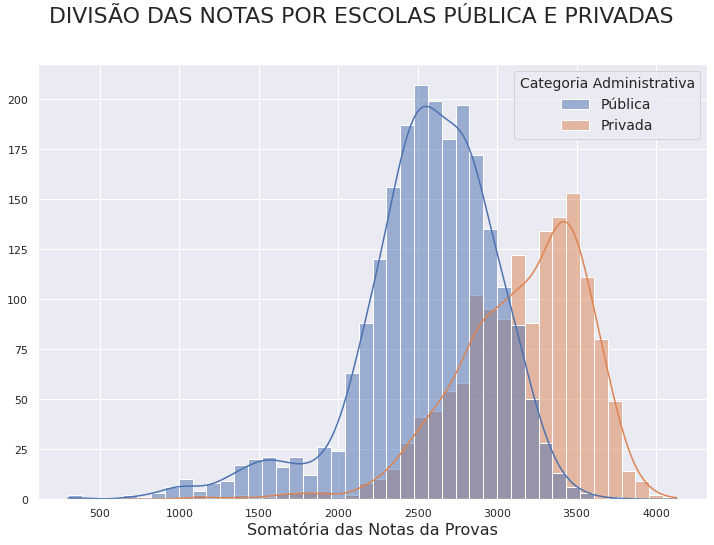

In [ ]:
#@title Figura 3: Divisão de notas entre escolas públicas e privadas das escolas de São José dos Campos
fig3 = plt.figure(figsize=(12,8))
fig3 = sns.histplot(escolas_nomes, x = "NU_NOTA_TOTAL", 
             hue="Categoria Administrativa", 
             kde=True)
fig3.figure.suptitle("DIVISÃO DAS NOTAS POR ESCOLAS PÚBLICA E PRIVADAS"
                      , fontsize = 22)

plt.ylabel('', fontsize=16)
plt.xlabel("Somatória das Notas da Provas", size=16);

Pela Figura 3 é possível observar que há maior concentração de alunos com notas mais altas nas escolas privadas se comparadas a concentração de alunos de escolas públicas, o que demonstra claramente **a diferença de qualidade entre o ensio público e privado.** 

Muitas escolas particulares felizmente tem alguns programas de inclusão, como bolsa ou instituições de ensino sem fins lucrativos com ivestimento do setor privado.

Fazendo com que as notas do enem em função da renda familiar seja mais uniforme do que demonstrado na Figura 1. Esta distribuição é mostrada na Figura 4.

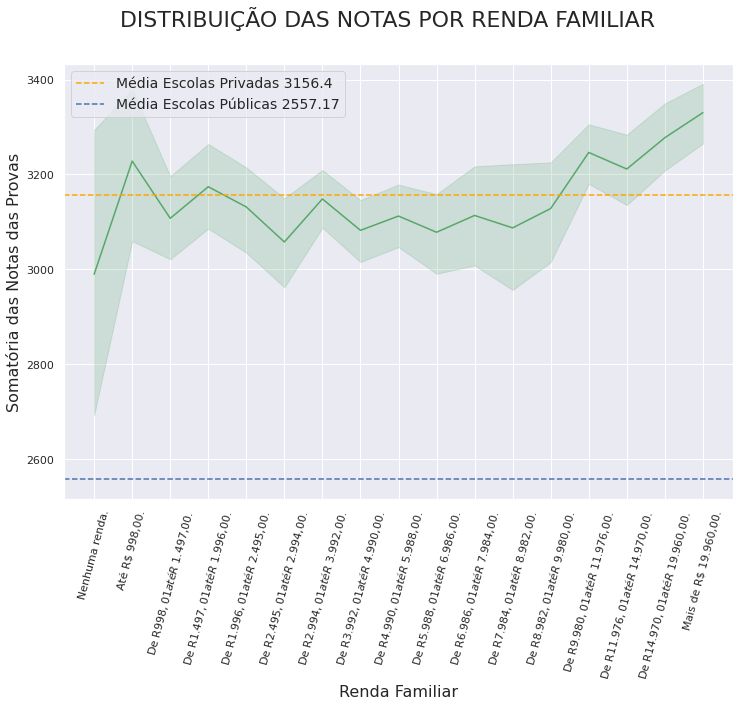

In [ ]:
#@title Figura 4: Distribuição de notas por renda familiar das escolas privadas de São José dos Campos
# calculo das médias das notas
media_escolas_privadas = round(escolas_nomes.query(
    '`Categoria Administrativa` == "Privada"')\
    ['NU_NOTA_TOTAL'].mean(),2)

media_escolas_publica = round(escolas_nomes.query(
    '`Categoria Administrativa` == "Pública"')\
    ['NU_NOTA_TOTAL'].mean(),2)
# separando dados das escolas privada
escolas_nomes_privada = escolas_nomes.\
query('`Categoria Administrativa` == "Privada"')
# criando dataframe com renda em ordem crescente
# e aplicando dicionário
df3 = escolas_nomes_privada\
[["Q006","NU_NOTA_TOTAL"]].sort_values(by="Q006")
df3["Q006"] = df3["Q006"].replace(renda_familiar)
# plot do gráfico
fig4 = plt.figure(figsize=(12,8)) # tamando da figura
fig4 = sns.lineplot(data = df3, x='Q006', y="NU_NOTA_TOTAL", 
             sort=True, color='g')
# adição de subtitulo
fig4.figure.suptitle("DISTRIBUIÇÃO DAS NOTAS POR RENDA FAMILIAR"
                      , fontsize = 22)
# parâmetros adicionais do eixo
plt.ylabel('Somatória das Notas das Provas', fontsize=16)
plt.xlabel("Renda Familiar", size=16,);
# rotação dos valores do eixo x
plt.xticks(rotation=75)
# plot de linhas verticais para as médias com legenda
medidas = [media_escolas_privadas, media_escolas_publica]
nomes = ["Média Escolas Privadas","Média Escolas Públicas"]
cores = ['orange','b']

for medida, nome, cor in zip(medidas, nomes, cores):
  plt.axhline(y=medida, linestyle='--', linewidth=1.5, 
              label=f'{nome} {medida}', c=cor)
plt.legend();


Existem algumas escolas privadas de São José dos Campos que tem parceria com um institudo social sem fins lucrativos que identifica jovens talentos e concede bolsas nas escolas particulares da cidade, nos gáficos abaixo é possível observar (Figura 5) esta inclusão social através da distribuição de notas em função da renda familiar.

Os gráficos são de duas escolas renomadas que aqui foram referêciadas como Escola A e B mas que reconhecidamente possuem bolsas de inclusão.

Observe principalmente a escola A tem notas mais uniformes, mesmo para os inscritos de rendas inferiores.

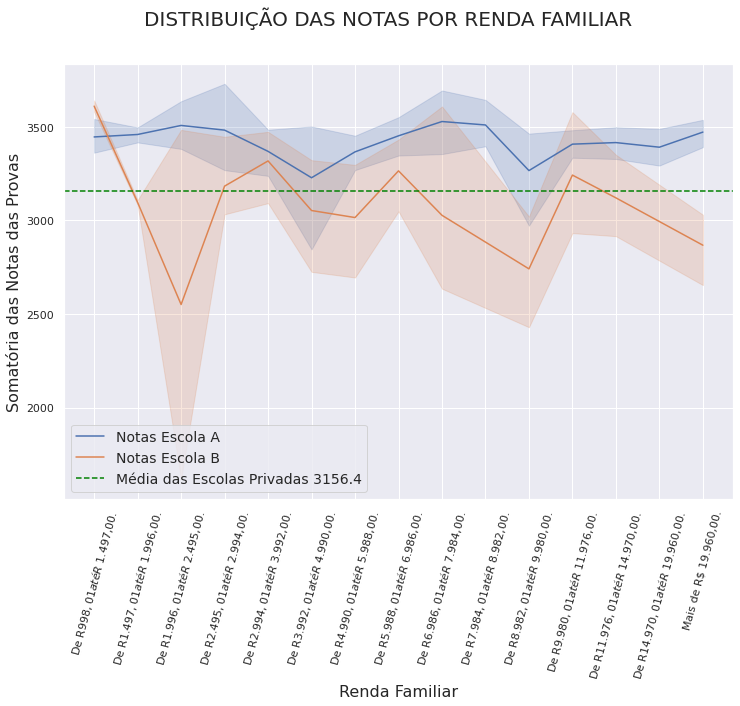

In [ ]:
#@title Figura 5: Distribuição de notas do ENEM por renda familiar de escolas com programa de bolsas
# separando dados das escolas pelos código da escolas
escola_a = escolas_nomes_privada\
.query('CO_ESCOLA==35175572 | CO_ESCOLA==35372341')
escola_b = escolas_nomes_privada\
.query('CO_ESCOLA==35130783 | CO_ESCOLA==35134259 | CO_ESCOLA==35802918')
escola_c = escolas_nomes_privada\
.query('CO_ESCOLA==35137170')
# criando dataframes com ordem de renda crescente e aplicando
# dicionáiro para o plot

df4 = escola_a[["Q006","NU_NOTA_TOTAL"]].sort_values(by="Q006")
df4["Q006"] = df4["Q006"].replace(renda_familiar)

df5 = escola_b[["Q006","NU_NOTA_TOTAL"]].sort_values(by="Q006")
df5["Q006"] = df5["Q006"].replace(renda_familiar)

# definindo tamano da figura do plot
fig6 = plt.figure(figsize=(12,8))
# plot da primeira Escola
fig6 = sns.lineplot(data = df4, x='Q006', y="NU_NOTA_TOTAL", 
             sort=True, label='Notas Escola A')
# plot da segunda Escola
fig6 = sns.lineplot(data = df5, x='Q006', y="NU_NOTA_TOTAL", 
             sort=True, label='Notas Escola B')
# adicionando subtitulo
fig6.figure.suptitle("DISTRIBUIÇÃO DAS NOTAS POR RENDA FAMILIAR"
                      , fontsize = 20)
# adicionando labels e rotacionando valores do eixo x
plt.ylabel('Somatória das Notas das Provas', fontsize=16)
plt.xlabel("Renda Familiar", size=16,);
plt.xticks(rotation=75)
# adicionando reta horizontal dos valores médios
medidas = [media_escolas_privadas, media_escolas_publica]
nomes = ["Média Escolas Privadas","Média Escolas Públicas"]
plt.axhline(y=media_escolas_privadas, linestyle='--', linewidth=1.5, 
              label=f'Média das Escolas Privadas {media_escolas_privadas}',
             c='green')
# incluindo legenda
plt.legend();

Mas o caso mais relevante de São José dos Campos é uma escola (aqui referênciada como Escola X) que é uma escola **sem fins lucrativos, sem mensalidade(até 2019) gerida por uma empresa do setor privado**.

Esta escola até 2019 **só aceitava alunos oriundos de escola pública e com renda familiar baixa**. Em 2019 passou a aceitar 20% dos alunos que não se enquadram na regras acima, mas estes com cobrança de mensalidade.

Esta escola vem se destacando como modelo de ensino na cidade, desde a sua fundação.

Agora se nos atentarmos ao desempenho da Escola X em relação as outras escolas privadas de São José dos Campos, ilustrado pela Figura 5 é possível observar que a **maioria dos alunos da Escola X estão acima da média das notas das escolas privadas de São José dos Campos** e consequentemente **acima das notas da Amostra utilizada  incialmente.** 

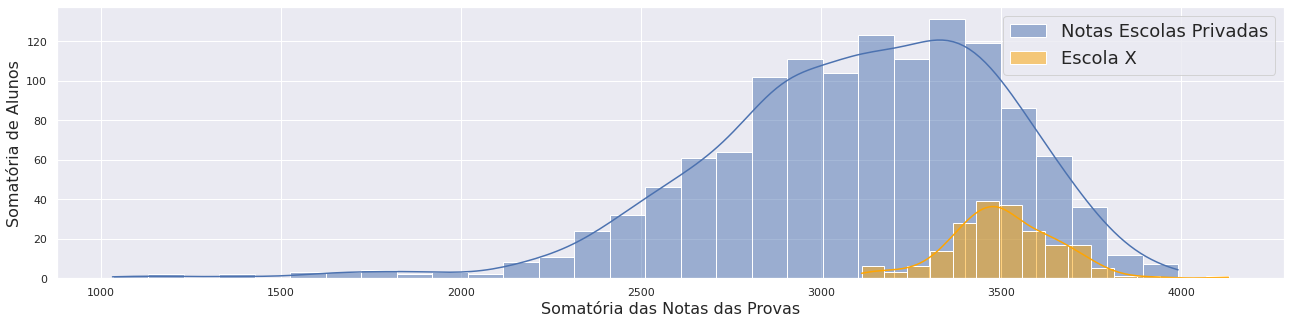

In [ ]:
#@title Figura 6: Desempenho da Escola X em relação as escolas privadas de São José dos Campos
# separanado dados da escola X
escola_emb = escolas_nomes_privada.query('CO_ESCOLA==35805555')
# separando dados das escolas exceto escola X
escola_emb_n = escolas_nomes_privada.query('CO_ESCOLA!=35805555')
# plot de histograma da escolas exceto X
sns.histplot(escola_emb_n['NU_NOTA_TOTAL'], kde=True, 
             label='Notas Escolas Privadas');
# plto histograma Escola X
sns.histplot(escola_emb['NU_NOTA_TOTAL'], kde=True, 
             label='Escola X', color='orange');
# adicionado Legenda e label para os eixos
plt.legend(prop={'size': 18})
plt.xlabel('Somatória das Notas das Provas', fontsize=16)
plt.ylabel('Somatória de Alunos', fontsize=16);

---


## **Conclusões:**

A diferença entre as notas do ensino público e privado mostram claramente a diferença da qualidade do ensino, mas existe ainda sim uma forma de prover acesso a este ensino para alunos de renda familiar baixa. Estas formas podem ser através de investimento em bolsa de estudos em escolas privadas ou através do investimento direto de empresas privadas em eduação de qualidade.

Infelizmente não podemos depender do poder público para melhorar a qualidade do ensino público, a curto prazo a única solução para acesso ao ensino de qualidade é a ampliação destas ações, que conforme este documento mostra trazem resultado

### ***Conclusõe secundárias:***


*   As respostas da pergunta sobre tipo de Escola não podem ser consideradas para uma análise precisa, uma vez que a pergunta é respondida de forma imprecisa.



---



---


### ***Observações sobre o método da análise:***

*Fonte dos dados:Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira .Brasília: Inep, 2020-10-22. Disponível em : 
<http://download.inep.gov.br/microdados/microdados_enem_2019.zip>.     
<http://inep.gov.br/dados/catalogo-de-escolas>*

*Número de inscritos total = 5.095.270*

*Para facilitar a análise e viabilizar a execução dos códigos no Google Colab, foi utilizado uma amostra dos dados totais.*

*Número de inscritos na amostra utilizada = 196.436*

*Por se tratar de instituições de ensino privado, seus nómes aqui foram omitidos, mas os dados foram devidamente separados conforme pode ser observado nos códigos, maiores detalhes pode me contactar.

Marcelo Serves <mserves@gmail.com>*

---

